<a href="https://colab.research.google.com/github/ashwin73/FlipkartGrid6.0/blob/main/FruitFreshness_GaborFilterDefects_PerspectiveTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from keras.models import load_model

drive.mount('/content/drive')

#Load your model
model_path= '/content/drive/My Drive/FruitFreshness.h5'
model=load_model(model_path)

# Display model architecture
model.summary()


Mounted at /content/drive


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 227, 227, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN_1 (BatchNormalization)            │ (None, 227, 227, 3)         │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Cov_1 (Conv2D)                       │ (None, 225, 225, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_1 (MaxPooling2D)             │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN_2 (BatchNormalization)            │ (None, 112, 112, 16)        │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Cov_2 (Conv2D)                       │ (None, 108, 108, 32)        │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool_2 (MaxPooling2D)             │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BN_3 (BatchNormalization)            │ (None, 54, 54, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 2916, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BiLSTM_1 (Bidirectional)             │ (None, 2916, 128)           │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BiLSTM_2 (Bidirectional)             │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC_1 (Dense)                         │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC_2 (Dense)                         │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC_3 (Dense)                         │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC_4 (Dense)                         │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,194 (692.17 KB)

 Trainable params: 177,090 (691.76 KB)

 Non-trainable params: 102 (408.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
class_labels = ['fresh_apple', 'fresh_banana', 'fresh_bitter_gourd', 'fresh_capsicum', 'fresh_orange', 'fresh_tomato',
              'stale_apple', 'stale_banana', 'stale_bitter_gourd', 'stale_capsicum', 'stale_orange', 'stale_tomato']
IMG_HEIGHT = 227
IMG_WIDTH = 227
# Function to preprocess and predict on a new image
def predict_image(image_path):
    # Load the image and resize it to match the input shape expected by the model
    new_image=image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))

    # Convert the image to array format (Tensor)
    new_image=image.img_to_array(new_image)

    # Normalize the image
    new_image=new_image / 255.0


    new_image=np.expand_dims(new_image, axis=0)  # Shape: (1, IMG_HEIGHT, IMG_WIDTH, 3)


    prediction=model.predict(new_image)

    predicted_class=tf.argmax(prediction, axis=1)
    predicted_label=class_labels[predicted_class[0]]
    plt.imshow(image.load_img(image_path))
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')
    plt.show()

    return predicted_label

image_path="/content/apple.png"
predicted_label=predict_image(image_path)
print(f"Predicted label:{predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Predicted label:stale_apple


Tear detected: Yes


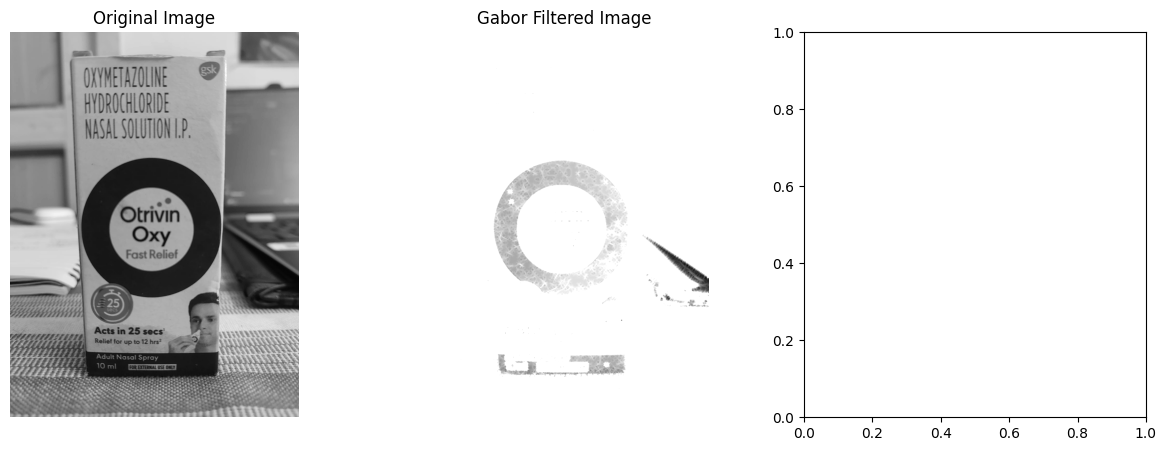

In [ ]:
import cv2
import numpy as np
from skimage import feature, color
import matplotlib.pyplot as plt

# Load an image in grayscale
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load!")
    return image

# Apply Local Binary Pattern (LBP)



# Apply Gabor filter bank (multiple filters at different scales and orientations)
def apply_gabor_filter(image, num_scales=4, num_orientations=6):
    gabor_images = []

    # Generate Gabor kernels for different scales and orientations
    for scale in range(1, num_scales + 1):
        for theta in range(num_orientations):
            theta_rad = theta * np.pi / num_orientations
            kernel = cv2.getGaborKernel((21, 21), sigma=4.0, theta=theta_rad, lambd=10.0/scale, gamma=0.5, psi=0)
            filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)
            gabor_images.append(filtered_image)

    # Combine all Gabor-filtered images
    combined_gabor = np.maximum.reduce(gabor_images)
    return combined_gabor

# Detect tears based on Gabor filter (edge detection on Gabor-filtered output)
def detect_tear_gabor(gabor_image, edge_threshold=100):
    # Apply edge detection (Canny) to the Gabor filtered image
    edges = cv2.Canny(gabor_image, threshold1=edge_threshold, threshold2=edge_threshold * 2)

    # Check if a significant number of edges are detected (indicating a tear)
    edge_density = np.sum(edges) / edges.size
    if edge_density > 0.05:  # Heuristic threshold
        return True  # Potential tear detected
    return False


# Plot results
def plot_results(original, gabor):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Original Image
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')


    # Gabor Filtered Image
    ax[1].imshow(gabor, cmap='gray')
    ax[1].set_title('Gabor Filtered Image')
    ax[1].axis('off')

    plt.show()

# Main function
def process_image(image_path):
    # Load the image
    image = load_image(image_path)

    # Apply Local Binary Pattern (LBP)


    # Apply Gabor Filters
    gabor_image = apply_gabor_filter(image)

    tear_detected = detect_tear_gabor(gabor_image)

    # Print results


    if tear_detected:
        print("Tear detected: Yes")
    else:
        print("Tear detected: No")

    # Plot the results
    plot_results(image, gabor_image)

# Example usage:
image_path = '/content/WhatsApp Image 2024-10-18 at 5.02.40 PM.jpeg'  # Replace with the path to your image
process_image(image_path)

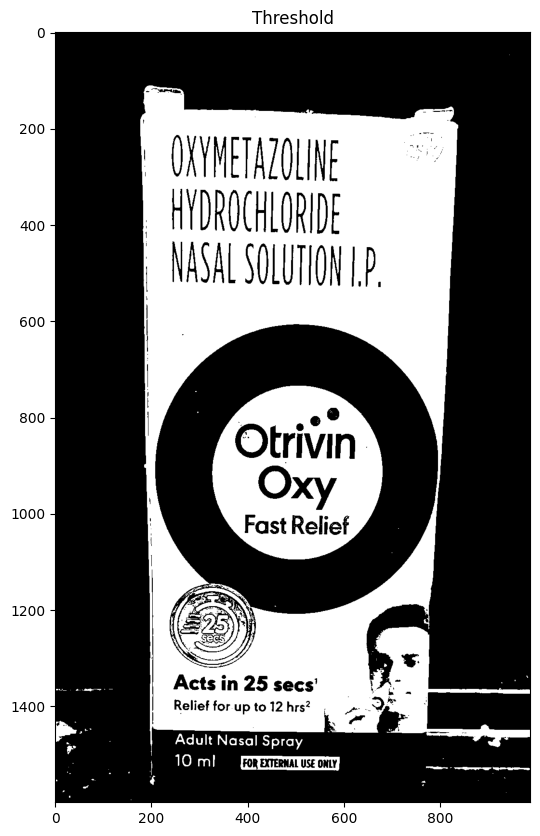

95


In [ ]:
#PERSPECTIVE TRANSFORM FOR IMAGE BOUNDING THE AUTO CROPPING

import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title="Image",image=None,size=10):
    w,h=image.shape[0],image.shape[1]
    aspect_ratio=w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

image=cv2.imread('/content/OtrivinBbg.jpeg')
image2=cv2.imread("/content/OtrivinBbg.jpeg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

_,th=cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#imshow("Original",image)
imshow("Threshold",th)

contours,hierarchy=cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image,contours,-1,(0,255,0),thickness=2)
imshow("Contours",image)
print(str(len(contours)))

Overall bounding box - min_x: 0, max_x: 988, min_y: 47, max_y: 1596


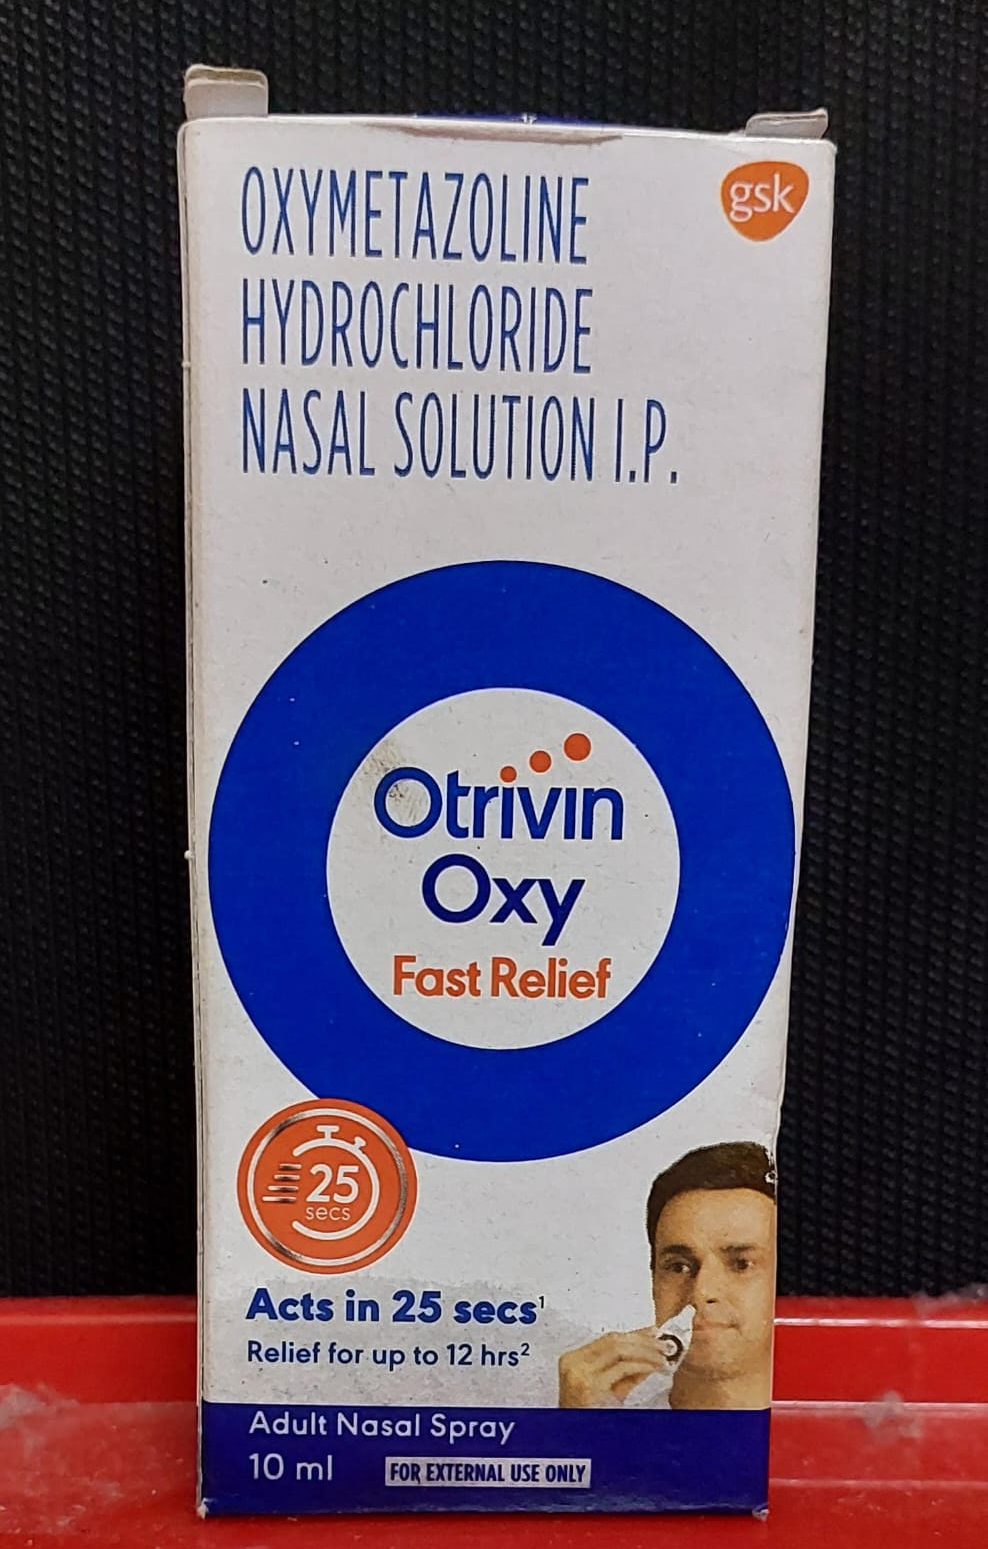

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


sorted_contours=sorted(contours,key=cv2.contourArea,reverse=True)

min_x=float('inf')
max_x=float('-inf')
min_y=float('inf')
max_y=float('-inf')
for cnt in sorted_contours:
    x,y,w,h=cv2.boundingRect(cnt)
    min_x=min(min_x, x)
    max_x=max(max_x, x + w)
    min_y=min(min_y, y)
    max_y=max(max_y, y + h)

#print(f"Overall bounding box - min_x:{min_x},max_x:{max_x},min_y:{min_y},max_y:{max_y}")
cv2.rectangle(image,(min_x, min_y),(max_x, max_y),(0, 255, 0),2)
cropped_image=image2[min_y:max_y, min_x:max_x]
cv2_imshow(cropped_image)
cv2.waitKey(0)
